In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [5]:
# Read dataset file
df = pd.read_csv('ETH.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets by 5:3:2
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [6]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7895.750, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7498.253, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=7413.617, Time=0.15 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=7386.336, Time=0.17 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=7303.940, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=7296.229, Time=0.29 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.09 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7298.224, Time=0.97 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 4.841 seconds


ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# make predictions on the validate set
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [8]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 1810.9779043183553
Testing RMSE: 3490.6724412006993
Validation MAPE: 112.03493732796159
Testing MAPE: 112.06760450669002
Validation MAE: 1733.1433154653482
Testing MAE: 3151.5598719044488


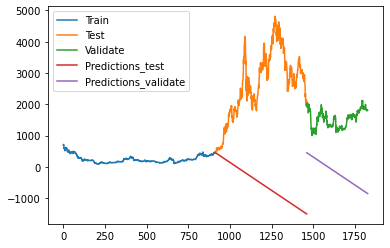

In [9]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()